<a href="https://colab.research.google.com/github/apriandito/simple-sma/blob/main/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import the necessary libraries
import re
import pandas as pd

In [22]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/apriandito/simple-sma/main/tweet-gojek.csv")
df[["username","text"]]

,username,text
0,@cindyatikaa,Padahal tarif gojek dkk itu potongannya besar
1,@moshmoshiy,Mending harga pasti aja deh. Orang ke gojek it...
2,@jujuanthem,gojek knp error mulu dah mau pake voucher aja ...
3,@jjvalsen,gue yang tiap naik gojek pake voucher tapi jar...
4,@livelovekuroo,gojek spicy chicken ga ya LAGI PENGEN BGT DEMI...
...,...,...
1038,@vosquampulchra,nangis waktu naik gojek
1039,@venusrkive,"jalan yg sebrang fkik itu, disitu banyak abang..."
1040,@14kdlr,aku gojek! grab kadang suka... gajelas.. drive...
1041,@heeycollection,aku mau pesen gojek pulang kagak jadi2 dahh wk...


In [13]:
# Create empty edgelist
edge_list = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    account_name = row['username']
    tweet = row['text']

    # Use regex to find mentions in the tweet
    mentions = re.findall(r'@(\w+)', tweet)

    # Create edges between the account_name and each mentioned account
    edges = [(account_name, mention) for mention in mentions]

    # Extend the edge list with the newly created edges
    edge_list.extend(edges)

# Create a new DataFrame from the edge list
edgelist = pd.DataFrame(edge_list, columns=['source', 'target'])
edgelist

,source,target
0,@_kmpng,gojekindonesia
1,@moubchi,gojekindonesia
2,@tukangngopihits,kemenhub151
3,@bignaughtygirlz,gojekindonesia
4,@jaka_mat2,gojekindonesia
5,@haryomukti,gojekindonesia
6,@Sunny10vely,WayV_official
7,@Indonesia_Anbu,gojekindonesia
8,@krc33m,gojekindonesia
9,@hazelnotae,PDAMKotaSMG


In [14]:
# Prepend '@' to each entry in the 'target' column
edgelist['target'] = '@' + edgelist['target']
edgelist

,source,target
0,@_kmpng,@gojekindonesia
1,@moubchi,@gojekindonesia
2,@tukangngopihits,@kemenhub151
3,@bignaughtygirlz,@gojekindonesia
4,@jaka_mat2,@gojekindonesia
5,@haryomukti,@gojekindonesia
6,@Sunny10vely,@WayV_official
7,@Indonesia_Anbu,@gojekindonesia
8,@krc33m,@gojekindonesia
9,@hazelnotae,@PDAMKotaSMG


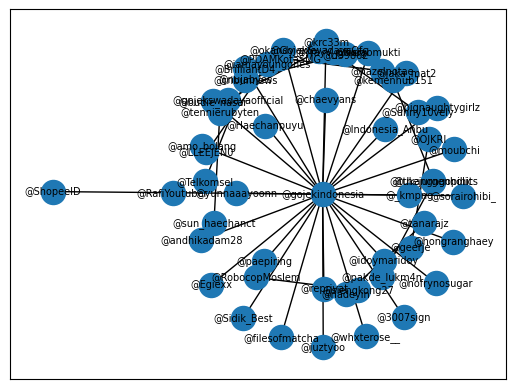

In [18]:
# Import the necessary libraries
import networkx as nx

# Create a graph from the edgelist
G = nx.from_pandas_edgelist(edgelist, source='source', target='target')

# Visualize the graph
nx.draw_networkx(G, pos = nx.kamada_kawai_layout(G), font_size = 7, with_labels= True)

In [19]:
# Calculate number of nodes
num_nodes = G.number_of_nodes()

# Calculate number of edges
num_edges = G.number_of_edges()

# Calculate density
density = nx.density(G)

# Create a dataframe based on the results
network_properties = pd.DataFrame(data= {'num_nodes':[num_nodes],
                                 'num_edges':[num_edges],
                                 'density':[density]})
# Show network properties
network_properties

,num_nodes,num_edges,density
0,54,41,0.028651


In [20]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate closeness centrality
eigenvector_centrality = nx.closeness_centrality(G)

# Create a dataframe based on the results
centralities = pd.DataFrame([degree_centrality, betweenness_centrality,
                             closeness_centrality, eigenvector_centrality]).T
centralities.columns = ['degree_centrality', 'betweenness_centrality',
                        'closeness_centrality', 'eigenvector_centrality']

# Show centralities
centralities

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
@_kmpng,0.018868,0.000000,0.273585,0.273585
@gojekindonesia,0.528302,0.293904,0.528931,0.528931
@moubchi,0.018868,0.000000,0.273585,0.273585
@tukangngopihits,0.018868,0.000000,0.018868,0.018868
@kemenhub151,0.018868,0.000000,0.018868,0.018868
@bignaughtygirlz,0.018868,0.000000,0.273585,0.273585
@jaka_mat2,0.018868,0.000000,0.273585,0.273585
@haryomukti,0.018868,0.000000,0.273585,0.273585
@Sunny10vely,0.018868,0.000000,0.018868,0.018868
@WayV_official,0.018868,0.000000,0.018868,0.018868
